In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import json
import io

%matplotlib inline
plt.style.use('Solarize_Light2')

In [2]:
url = 'https://www1.ncdc.noaa.gov/pub/data/cdo/samples/GHCND_sample_csv.csv'
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,TMAX,TMIN,PRCP
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100101,-178,-311,0
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100102,-244,-322,0
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100103,-194,-289,0
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100104,-167,-200,15
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100105,-133,-167,9999


In [4]:
print(data.shape)

(31, 9)


In [16]:
df = pd.DataFrame(data, columns=['DATE','TMAX']).set_index('DATE')

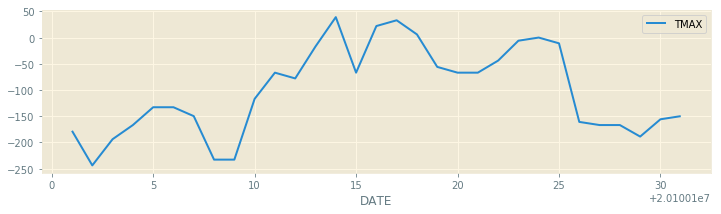

In [17]:
df.plot(figsize=(12, 3))

In [26]:
import statsmodels.api as sm
from statsmodels.api import OLS
import numpy as np

In [27]:
x, y = data['DATE'], data['TMAX']

In [28]:
x = sm.add_constant(x)
model = OLS(y, x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   TMAX   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.245
Date:                Tue, 04 Jun 2019   Prob (F-statistic):              0.145
Time:                        11:01:41   Log-Likelihood:                -179.80
No. Observations:                  31   AIC:                             363.6
Df Residuals:                      29   BIC:                             366.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.997e+07   3.34e+07     -1.498      0.1

AttributeError: 'Series' object has no attribute 'x'

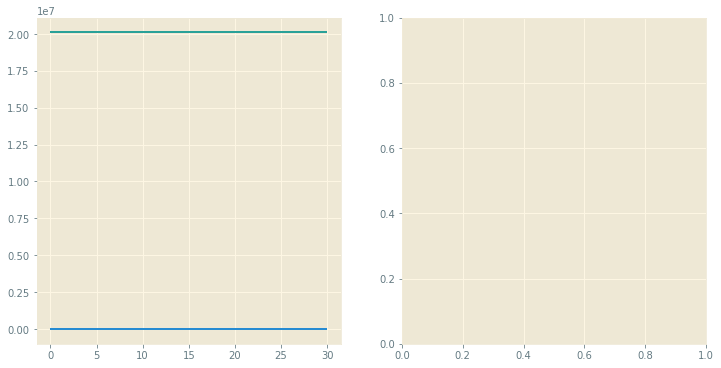

In [30]:
"""

fig, ax = plt.subplots(1, 2, figsize=(12,6));
ax[0].plot(x.values, label='trend')
ax[0].plot([res.params.x*i + res.params.const for i in np.arange(len(x))])
ax[1].plot(res.resid.values);
ax[1].plot(np.abs(res.resid.values));
ax[1].hlines(0, 0, len(res.resid), color='r');
ax[0].set_title("Trend and Regression");
ax[1].set_title("Residuals");"""